In [25]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Загружаем данные
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Список с названиями классов
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 
           'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

# Преобразование размерности изображений
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# Нормализация данных
x_train = x_train / 255 
x_test = x_test / 255 

# Преобразуем метки в категории
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [27]:
# Создаем последовательную модель
model = Sequential()

# Добавляем уровни сети
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Компилируем модель
model.compile(loss="categorical_crossentropy", 
              optimizer="SGD", 
              metrics=["accuracy"])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 800)               628000    
                                                                 
 dense_5 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [28]:
# Обучаем сеть
epochs_list = [100,200,300,400,500]
scores_list = []
for i in range(0,len(epochs_list)):
    history = model.fit(x_train, y_train, batch_size=200, epochs=epochs_list[i],validation_split=0.2,verbose=1)
    scores = model.evaluate(x_test, y_test, verbose=1)
    scores_list.append(scores)
print(scores_list)


Epoch 1/100
240/240 [==============================] - 2s 5ms/step - loss: 1.1799 - accuracy: 0.6569 - val_loss: 0.8403 - val_accuracy: 0.7391
Epoch 2/100
240/240 [==============================] - 1s 5ms/step - loss: 0.7664 - accuracy: 0.7565 - val_loss: 0.6974 - val_accuracy: 0.7762
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 0.6681 - accuracy: 0.7868 - val_loss: 0.6322 - val_accuracy: 0.7964
Epoch 4/100
240/240 [==============================] - 1s 5ms/step - loss: 0.6147 - accuracy: 0.8044 - val_loss: 0.5956 - val_accuracy: 0.8042
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5797 - accuracy: 0.8129 - val_loss: 0.5666 - val_accuracy: 0.8125
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5544 - accuracy: 0.8201 - val_loss: 0.5448 - val_accuracy: 0.8163
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 0.5349 - accuracy: 0.8254 - val_loss: 0.5274 - val_accuracy: 0.8221

Text(0.5, 1.0, 'Зависимость лоса от эпох')

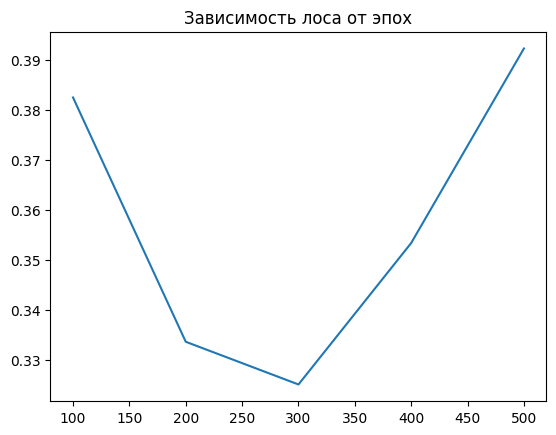

In [ ]:
list = np.array(scores_list).flatten()
plt.plot(epochs_list,list[::2], linestyle = "solid")
plt.title("Зависимость лоса от эпох")

[0.86500001 0.8811     0.89109999 0.89179999 0.89300001]
[0.38244089 0.33356246 0.32501683 0.35332415 0.39224431]


Text(0.5, 1.0, 'Зависимость aкураси от эпох')

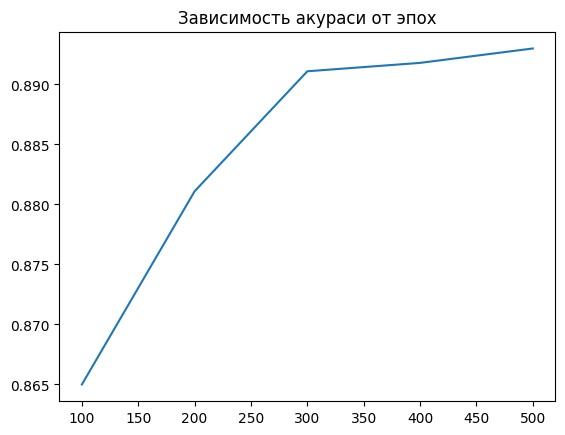

In [ ]:
print(list[1::2])
print(list[::2])
plt.plot(epochs_list,list[1::2], linestyle = "solid")
plt.title("Зависимость aкураси от эпох")